# Week 4 - Logistic Regression and Feature Scaling


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_pima = pd.read_csv("pima_indian_diabetes_dataset.csv") 
#replaced #2 from milestone 3: df_heart = pd.read_csv("heart_disease.csv")

DATASET 1: Diabetes Health Indicators

In [3]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:

# 1. Load your dataset
y = df["Diabetes_012"]         
X = df.drop(columns=["Diabetes_012"])

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features (important for Lasso/Ridge/ElasticNet)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Fit models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


LinearRegression: RMSE = 0.63, R² = 0.17
Ridge: RMSE = 0.63, R² = 0.17
Lasso: RMSE = 0.66, R² = 0.11
ElasticNet: RMSE = 0.64, R² = 0.15


Linear regression is not good at predicting diabetes status becuase many of the columns are categorical and have complex relationships. Classification models are a better choice. 

In [6]:

#Predicting with just BMI column
# 1. Load your dataset

y = df["Diabetes_012"]          
X = df[["BMI"]]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features (important for Lasso/Ridge/ElasticNet)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Fit models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


LinearRegression: RMSE = 0.68, R² = 0.05
Ridge: RMSE = 0.68, R² = 0.05
Lasso: RMSE = 0.69, R² = 0.03
ElasticNet: RMSE = 0.68, R² = 0.04


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


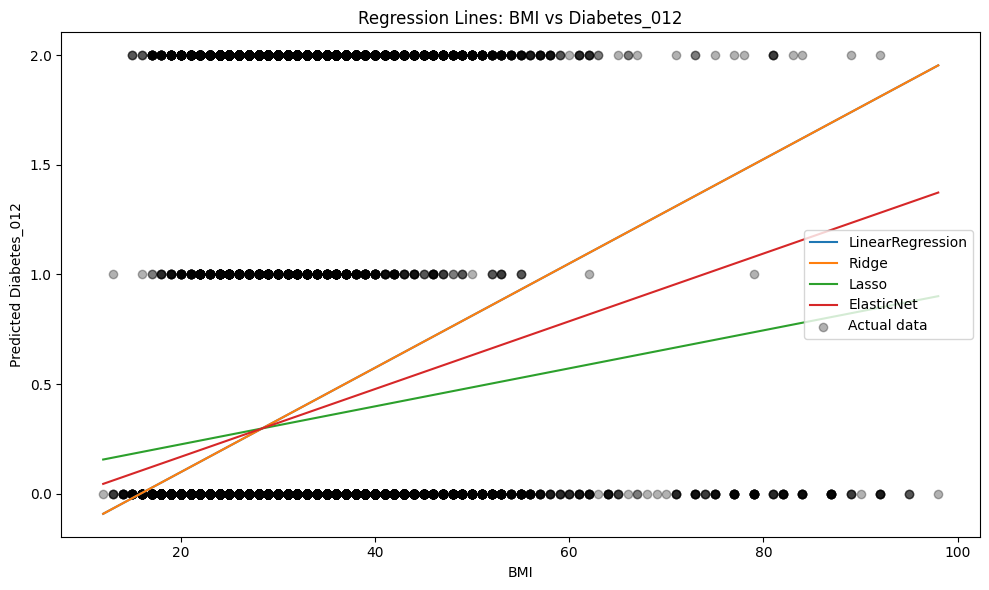

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot predictions vs actual BMI for each model
plt.figure(figsize=(10, 6))
bmi_range = np.linspace(X["BMI"].min(), X["BMI"].max(), 100).reshape(-1, 1)
bmi_scaled = scaler.transform(bmi_range)

for name, model in models.items():
    preds = model.predict(bmi_scaled)
    plt.plot(bmi_range, preds, label=name)

# Scatter actual test data
plt.scatter(X_test, y_test, alpha=0.3, color='black', label="Actual data")
plt.xlabel("BMI")
plt.ylabel("Predicted Diabetes_012")
plt.title("Regression Lines: BMI vs Diabetes_012")
plt.legend()
plt.tight_layout()
plt.show()


R squared got worse with just using BMI to predict the target. 

DATASET 2: Pima Indian Diabetes

In [8]:
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:

# 1. Load your dataset
y = df_pima["Outcome"]         
X = df_pima.drop(columns=["Outcome"])

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Standardize the features (important for Lasso/Ridge/ElasticNet)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Fit models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")


LinearRegression: RMSE = 0.41, R² = 0.26
Ridge: RMSE = 0.41, R² = 0.26
Lasso: RMSE = 0.43, R² = 0.20
ElasticNet: RMSE = 0.42, R² = 0.23


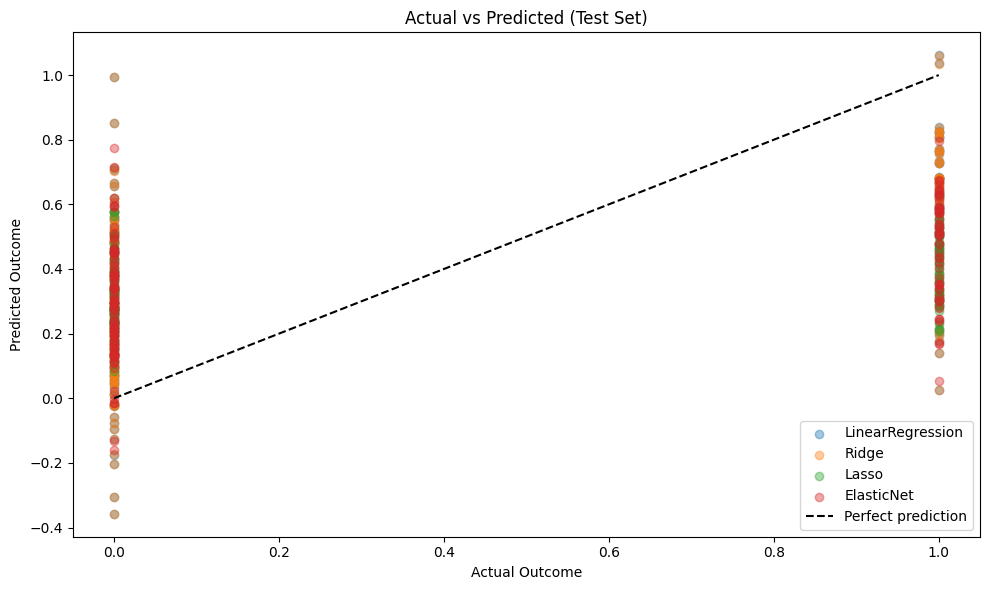

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, alpha=0.4, label=name)

plt.plot([0, 1], [0, 1], 'k--', label="Perfect prediction")
plt.xlabel("Actual Outcome")
plt.ylabel("Predicted Outcome")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


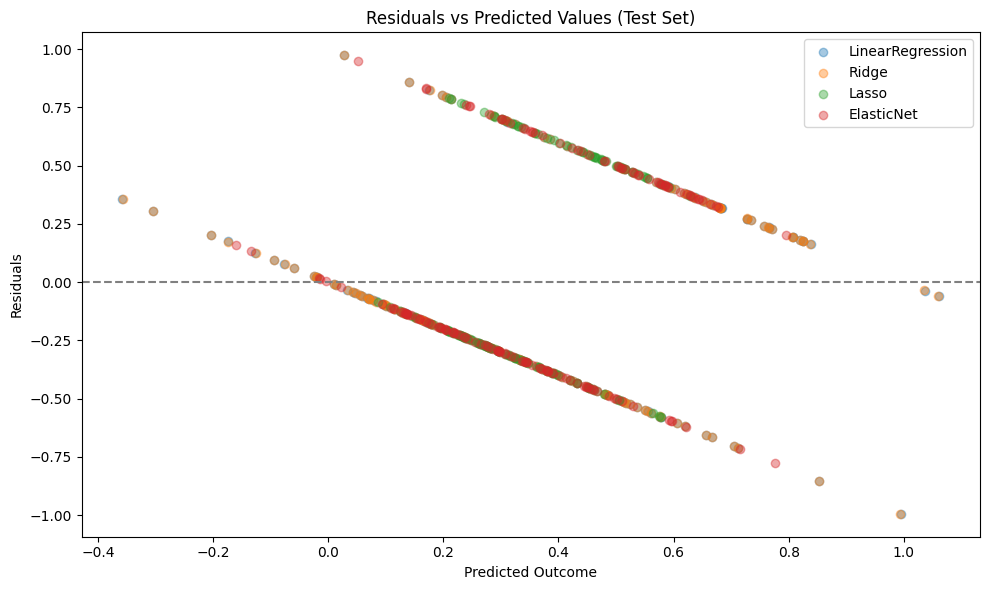

In [11]:
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.4, label=name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Predicted Outcome")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Test Set)")
plt.legend()
plt.tight_layout()
plt.show()


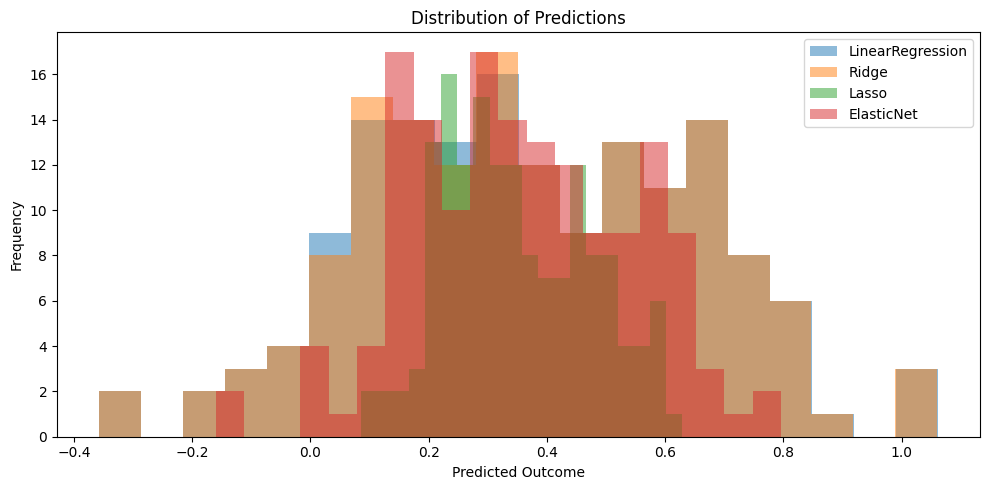

In [12]:
plt.figure(figsize=(10, 5))

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plt.hist(y_pred, bins=20, alpha=0.5, label=name)

plt.title("Distribution of Predictions")
plt.xlabel("Predicted Outcome")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


Again, linear regression is not good at predicting diabetes status becuase the target column is categorical. Classification models are a better choice. 